# YZV 311E (Final Model File)
# Personalized Intervention for Alcohol Consumption
This project is a classification project where data science applications will be carried out on a data set of approximately 1 million rows created by the Korean Ministry of Health. The aim of the project is to detect citizens who consume alcohol by evaluating the physical and biological characteristics of people in the light of this data. For this, data analysis, data preprocessing, data visualization and machine learning methods will be applied step by step.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("smoking_drinking_dataset_Ver01.csv")
pd.set_option('display.max_columns', None) # in order to see all the columns
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,92.0,99.0,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,58.0,89.0,196.0,66.0,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,80.0,94.0,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,85.0,104.0,217.0,56.0,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,105.0,100.0,195.0,60.0,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [23]:
# Dropping duplicated data
df = df.drop_duplicates()
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000,991320.000000
mean,47.614529,162.240563,63.283884,81.233255,0.980833,0.978428,1.031495,1.030476,122.432360,76.052549,100.424305,195.556769,56.936984,113.037429,132.140030,14.229810,1.094221,0.860467,25.989424,25.755148,37.136152,1.608112
std,14.181346,9.282922,12.514101,11.850296,0.605954,0.604779,0.174652,0.171892,14.543083,9.889334,24.179852,38.660092,17.238578,35.842938,102.194762,1.584924,0.437719,0.480536,23.493668,26.308910,50.423811,0.818504
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


### Dropping outliers

In [24]:
Outliers_features_list = ['waistline', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
            'triglyceride', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

def remove_outliers(df, feature, iqr_factor):
    data = df[feature]
    
    # Calculate the interquartile range (IQR)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    # Filter rows with values outside the bounds
    filtered_df = df[(data >= lower_bound) & (data <= upper_bound)]
    
    return filtered_df

filt_df = df.copy()
for i in Outliers_features_list:
    filt_df = remove_outliers(filt_df, i, iqr_factor=2)
    
filt_df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000,785386.000000
mean,47.319006,161.584202,61.607299,79.774828,0.979187,0.976073,1.030716,1.029728,121.102129,75.144832,95.642032,193.299896,57.854861,113.112911,111.299411,14.050410,1.074313,0.836633,22.601023,20.323380,24.112020,1.523485
std,14.442922,9.245664,11.682217,9.192617,0.591877,0.588645,0.172548,0.169836,14.262956,9.631207,12.258935,35.500722,14.195061,32.493653,56.990176,1.544551,0.373193,0.194435,6.141732,9.083962,13.094543,0.783010
min,20.000000,130.000000,25.000000,49.000000,0.100000,0.100000,1.000000,1.000000,70.000000,33.000000,54.000000,72.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,73.000000,0.700000,0.700000,1.000000,1.000000,110.000000,70.000000,88.000000,169.000000,47.000000,90.000000,69.000000,13.000000,1.000000,0.700000,18.000000,14.000000,15.000000,1.000000
50%,45.000000,160.000000,60.000000,80.000000,1.000000,1.000000,1.000000,1.000000,120.000000,75.000000,94.000000,192.000000,56.000000,111.000000,97.000000,14.000000,1.000000,0.800000,22.000000,18.000000,20.000000,1.000000
75%,60.000000,170.000000,70.000000,86.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,102.000000,216.000000,67.000000,134.000000,140.000000,15.200000,1.000000,1.000000,26.000000,25.000000,30.000000,2.000000
max,85.000000,190.000000,130.000000,115.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,139.000000,317.000000,106.000000,225.000000,322.000000,25.000000,6.000000,1.600000,46.000000,53.000000,69.000000,3.000000


### Feature Engineering

In [25]:
# Body Mass Index (BMI)
def calculate_bmi(height, weight): 
    height_in_meters = height / 100 # cm -> m
    bmi = weight / (height_in_meters ** 2) 
    return bmi

filt_df['bmi'] = filt_df.apply(lambda row: calculate_bmi(row['height'], row['weight']), axis=1)
filt_df = filt_df.drop(['height', 'weight'], axis=1)
filt_df.insert(loc=2, column='BMI', value=filt_df['bmi'])
filt_df = filt_df.drop('bmi', axis=1)

# Visual impairment
visual_impairment = (filt_df["sight_left"] + filt_df["sight_right"]) / 2
filt_df.insert(loc=4, column='visual_impairment', value = visual_impairment)
filt_df = filt_df.drop(['sight_right', 'sight_left'], axis=1)

# Hearing health
filt_df.insert(5, 'hearing_health', 'Healthy')
filt_df.loc[(filt_df['hear_left'] == 2) | (filt_df['hear_right'] == 2), 'hearing_health'] = "Defective"
filt_df = filt_df.drop(['hear_right', 'hear_left'], axis=1)

# Blood pressure
def categorize_blood_pressure(sbp, dbp):
    if sbp < 130 and dbp < 85:
        return 'Normal'
    elif 130 <= sbp < 140 or 85 <= dbp < 90:
        return 'High-Normal'
    elif sbp >= 140 or dbp >= 90:
        return 'Hypertension'

filt_df.insert(6, 'blood_pressure', 'None')
filt_df['blood_pressure'] = filt_df.apply(lambda row: categorize_blood_pressure(row['SBP'], row['DBP']), axis=1)
filt_df = filt_df.drop(['SBP', 'DBP'], axis=1)

# AST/ALT (De Ritis Ratio)
de_ritis = filt_df["SGOT_AST"] / filt_df["SGOT_ALT"]
filt_df.insert(loc = 7, column = 'AST/ALT', value = de_ritis)
filt_df = filt_df.drop(['SGOT_AST', 'SGOT_ALT'], axis=1)

# Dropping LDL_chole and HDL_chole
filt_df = filt_df.drop(["HDL_chole", "LDL_chole"], axis=1)

filt_df

,sex,age,BMI,waistline,visual_impairment,hearing_health,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,25.951557,90.0,1.00,Healthy,Normal,0.600000,99.0,193.0,92.0,17.1,1.0,1.0,40.0,1.0,Y
1,Male,30,24.691358,89.0,1.05,Healthy,High-Normal,0.555556,106.0,228.0,121.0,15.8,1.0,0.9,27.0,3.0,N
3,Male,50,26.122449,91.0,1.35,Healthy,High-Normal,0.852941,95.0,201.0,106.0,17.6,1.0,1.1,18.0,1.0,N
4,Male,50,22.038567,80.0,1.10,Healthy,High-Normal,1.583333,101.0,199.0,104.0,13.8,1.0,0.8,25.0,1.0,N
5,Male,50,20.202020,75.0,1.35,Healthy,Hypertension,0.725000,99.0,218.0,232.0,13.8,3.0,0.8,37.0,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,26.122449,92.1,1.50,Healthy,Normal,0.722222,88.0,198.0,132.0,15.0,1.0,1.0,27.0,1.0,N
991342,Male,35,25.951557,86.0,1.25,Healthy,Normal,0.823529,83.0,133.0,45.0,15.8,1.0,1.1,15.0,1.0,N
991343,Female,40,20.811655,68.0,0.85,Healthy,Normal,1.111111,90.0,205.0,157.0,14.3,1.0,0.8,17.0,3.0,Y
991344,Male,25,19.591837,72.0,1.25,Healthy,Normal,1.500000,69.0,122.0,53.0,14.5,1.0,0.8,17.0,1.0,N


### Encoding (Categorical to Numerical)

In [26]:
df_encoded = pd.get_dummies(filt_df, columns=['sex'], dtype=int)
df_encoded = pd.get_dummies(df_encoded, columns=['hearing_health'], dtype=int)

le = LabelEncoder()
df_encoded["blood_pressure"] = le.fit_transform(df_encoded["blood_pressure"])
df_encoded["blood_pressure"] = (df_encoded["blood_pressure"] + 1) % 3

df_encoded.insert(loc=0, column="sex", value=df_encoded["sex_Male"])
df_encoded = df_encoded.drop(["sex_Male", "sex_Female"], axis=1)

df_encoded.insert(loc=5, column="hearing_impairment", value=df_encoded["hearing_health_Defective"])
df_encoded = df_encoded.drop(["hearing_health_Defective", "hearing_health_Healthy"], axis=1)

df_encoded

,sex,age,BMI,waistline,visual_impairment,hearing_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,25.951557,90.0,1.00,0,0,0.600000,99.0,193.0,92.0,17.1,1.0,1.0,40.0,1.0,Y
1,1,30,24.691358,89.0,1.05,0,1,0.555556,106.0,228.0,121.0,15.8,1.0,0.9,27.0,3.0,N
3,1,50,26.122449,91.0,1.35,0,1,0.852941,95.0,201.0,106.0,17.6,1.0,1.1,18.0,1.0,N
4,1,50,22.038567,80.0,1.10,0,1,1.583333,101.0,199.0,104.0,13.8,1.0,0.8,25.0,1.0,N
5,1,50,20.202020,75.0,1.35,0,2,0.725000,99.0,218.0,232.0,13.8,3.0,0.8,37.0,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,26.122449,92.1,1.50,0,0,0.722222,88.0,198.0,132.0,15.0,1.0,1.0,27.0,1.0,N
991342,1,35,25.951557,86.0,1.25,0,0,0.823529,83.0,133.0,45.0,15.8,1.0,1.1,15.0,1.0,N
991343,0,40,20.811655,68.0,0.85,0,0,1.111111,90.0,205.0,157.0,14.3,1.0,0.8,17.0,3.0,Y
991344,1,25,19.591837,72.0,1.25,0,0,1.500000,69.0,122.0,53.0,14.5,1.0,0.8,17.0,1.0,N


### Scaling

In [27]:
standard_scaler = StandardScaler()
df_std_scaled = df_encoded.copy()
continuous_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
continuous_columns = continuous_columns.drop(["SMK_stat_type_cd"])

df_std_scaled[continuous_columns] = standard_scaler.fit_transform(df_encoded[continuous_columns])
df_std_scaled

,sex,age,BMI,waistline,visual_impairment,hearing_impairment,blood_pressure,AST/ALT,BLDS,tot_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,-0.852945,0.735922,1.112325,0.046668,0,0,-1.443020,0.273920,-0.008448,-0.338645,1.974420,-0.199126,0.840213,1.213329,1.0,Y
1,1,-1.199135,0.358725,1.003542,0.150977,0,1,-1.542539,0.844933,0.977448,0.170215,1.132751,-0.199126,0.325901,0.220548,3.0,N
3,1,0.185627,0.787072,1.221108,0.776833,0,1,-0.876639,-0.052373,0.216900,-0.092988,2.298139,-0.199126,1.354524,-0.466761,1.0,N
4,1,0.185627,-0.435297,0.024495,0.255286,0,1,0.758841,0.437067,0.160563,-0.128082,-0.162125,-0.199126,-0.188410,0.067813,1.0,N
5,1,0.185627,-0.985004,-0.519420,0.776833,0,2,-1.163122,0.273920,0.695764,2.117921,-0.162125,5.160037,-0.188410,0.984226,3.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,-0.160564,0.787072,1.340770,1.089761,0,0,-1.169342,-0.623385,0.132395,0.363231,0.614801,-0.199126,0.840213,0.220548,1.0,N
991342,1,-0.852945,0.735922,0.677193,0.568214,0,0,-0.942497,-1.031251,-1.698555,-1.163349,1.132751,-0.199126,1.354524,-0.695864,1.0,N
991343,0,-0.506754,-0.802531,-1.280901,-0.266260,0,0,-0.298550,-0.460239,0.329574,0.801903,0.161594,-0.199126,-0.188410,-0.543129,3.0,Y
991344,1,-1.545326,-1.167641,-0.845769,0.568214,0,0,0.572243,-2.173276,-2.008408,-1.022974,0.291082,-0.199126,-0.188410,-0.543129,1.0,N


### Running the model

After determining the best parameters(Random Forest Classifier)
Accuracy Score: 0.7128298369722991

               precision    recall  f1-score   support

           N       0.73      0.73      0.73    104798
           Y       0.69      0.69      0.69     91549

    accuracy                           0.71    196347
   macro avg       0.71      0.71      0.71    196347
weighted avg       0.71      0.71      0.71    196347
 



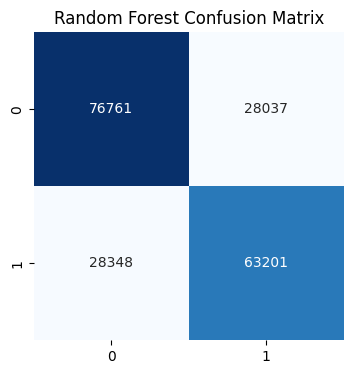

In [28]:
# Random Forest
X = df_std_scaled.iloc[:,:-1]
y = df_std_scaled.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rfc = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)

print("After determining the best parameters(Random Forest Classifier)")
print("Accuracy Score:", accuracy)
print("\n",report,"\n")
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rfc, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()